<a href="https://colab.research.google.com/github/hyuntaedo/FastCampus_DataMining_Problem/blob/main/Chapter_5_%EB%89%B4%EC%8A%A4%EC%97%90%EC%84%9C%EB%A7%8C_%EB%B3%B4%EB%8D%98_%EC%BD%94%EB%A1%9C%EB%82%9819_%EB%8D%B0%EC%9D%B4%ED%84%B0%2C_%EC%A7%81%EC%A0%91_%EB%B6%84%EC%84%9D%ED%95%98%EA%B3%A0_%EC%A7%81%EC%A0%91_%ED%8C%90%EB%8B%A8%ED%95%B4%EB%B4%85%EC%8B%9C%EB%8B%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주제 : 뉴스에서만 보던 코로나-19 데이터, 직접 분석하고 직접 판단해봅시다.
----------

## 실습 가이드
    1. 데이터를 다운로드하여 Colab에 불러옵니다.
    2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    3. 코드는 위에서부터 아래로 순서대로 실행합니다.
    
    
## 데이터 소개
    - 이번 주제는 John Hopkins 대학의 COVID-19 데이터셋을 사용합니다.
    
    - 총 10개의 파일 중 2개의 Raw 데이터를 사용합니다.
    RAW_global_confirmed_cases.csv
    RAW_global_global_deaths.csv

    - 각 파일의 컬럼은 아래와 같습니다.
    Country/Region: 국가
    Province/State: 지방/주
    Lat: 지역의 위도
    Long: 지역의 경도
    날짜: 각 날짜의 확진자/사망자 수
    
    
    
- 데이터 출처: https://www.kaggle.com/antgoldbloom/covid19-data-from-john-hopkins-university

## 최종 목표
    - 계속해서 업데이트되는 라이브 데이터 분석하기
    - Pandas를 이용해 원하는 표 형태로 변경
    - 데이터 시각화를 통한 인사이트 습득 방법의 이해
    - Plotly를 이용하여 Interactive plot하기
    - FBProphet을 이용해 시계열 데이터를 처리하는 방법 습득
    - 학습된 모델로 부터의 인사이트 획득 방법 습득

- 출제자 : 신제용 강사
---

## Step 0. 시계열 데이터에 관하여

### 코로나19 데이터셋에 관하여

### 시계열 데이터와 일반 테이블 데이터와 다른 점


### FBProphet 라이브러리 설명

## Step 1. 데이터셋 준비하기

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 문제 1. Colab Notebook에 Kaggle API 세팅하기


In [1]:
import os

In [3]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
os.environ['KAGGLE_USERNAME'] = 'fastcampuskim'
os.environ['KAGGLE_KEY'] = 'c939a1e37f5ca93b6406a66fc8bb08e5'



### 문제 2. 데이터 다운로드 및 압축 해제하기


In [4]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기
!rm *.*
!kaggle datasets download -d antgoldbloom/covid19-data-from-john-hopkins-university
!unzip '*.zip'

rm: cannot remove '*.*': No such file or directory
  0% 0.00/5.23M [00:00<?, ?B/s]
100% 5.23M/5.23M [00:00<00:00, 82.3MB/s]
Archive:  covid19-data-from-john-hopkins-university.zip
  inflating: CONVENIENT_global_confirmed_cases.csv  
  inflating: CONVENIENT_global_deaths.csv  
  inflating: CONVENIENT_global_metadata.csv  
  inflating: CONVENIENT_us_confirmed_cases.csv  
  inflating: CONVENIENT_us_deaths.csv  
  inflating: CONVENIENT_us_metadata.csv  
  inflating: RAW_global_confirmed_cases.csv  
  inflating: RAW_global_deaths.csv   
  inflating: RAW_us_confirmed_cases.csv  
  inflating: RAW_us_deaths.csv       


### 문제 3. Pandas 라이브러리로 csv파일 읽어들이기


In [81]:
df_case = pd.read_csv('/content/RAW_global_confirmed_cases.csv')
df_death = pd.read_csv('/content/RAW_global_deaths.csv')

## Step 2. 데이터 구조 변경 및 시각화하기


### 문제 4. 데이터프레임 구조를 Date를 Index로, 지역을 Column으로 변경


In [75]:
df_death.head()

,Country/Region,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/2/21,6/3/21,6/4/21,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21,6/16/21,6/17/21,6/18/21,6/19/21,6/20/21,6/21/21,6/22/21,6/23/21,6/24/21,6/25/21,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21
0,Afghanistan,NaN,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3007,3034,3068,3104,3145,3187,3251,3305,3356,3412,3449,3527,3612,3683,3683,3842,3934,3934,3934,4215,4293,4366,4452,4519,4519,4519,4730,4794,4871,4962,4962,4962,4962,5283,5360,5415,5477,5561,5561,5561
1,Albania,NaN,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2451,2451,2451,2451,2451,2452,2452,2452,2452,2453,2453,2453,2453,2454,2454,2454,2454,2454,2454,2454,2455,2455,2455,2455,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456
2,Algeria,NaN,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3490,3497,3504,3510,3518,3527,3537,3544,3552,3560,3565,3571,3579,3588,3598,3605,3615,3624,3631,3641,3650,3660,3669,3678,3685,3693,3699,3708,3716,3726,3735,3745,3755,3765,3775,3786,3798,3811,3824,3836
3,Andorra,NaN,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127
4,Angola,NaN,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,780,784,788,794,797,800,803,811,815,819,825,831,836,842,847,851,853,856,859,868,875,878,881,883,887,889,891,894,900,903,906,910,913,915,920,925,925,928,929,935


In [82]:
df = df_case.drop(['Lat','Long'],axis=1).groupby('Country/Region').sum()
df = df.transpose()
df.index.name = 'Date'
df.reset_index(inplace=True)
df['Date'] = df["Date"].apply(lambda s:pd.to_datetime(str(s)))
df.set_index('Date',inplace=True)

In [83]:
def fix_dataframe(df):
  # TODO: 불필요한 컬럼 제거, Date를 datetime 객체로 변환, Date를 index로 변경
    df = df.drop(['Lat','Long'],axis=1).groupby('Country/Region').sum()
    df = df.transpose()
    df.index.name = 'Date'
    df.reset_index(inplace=True)
    df['Date'] = df["Date"].apply(lambda s:pd.to_datetime(str(s)))
    df.set_index('Date',inplace=True)
    return df

In [84]:
df_case = fix_dataframe(df_case)
df_death = fix_dataframe(df_death)

In [85]:
df_case

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Summer Olympics 2020,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,...,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,...,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,6,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,0,...,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,8,0,0,0,0,0,5,0,0,0,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-07,129021,132557,143032,14021,39491,1265,4593763,225801,30903,651008,336684,12965,266797,977568,4108,423519,1091095,13444,8227,2249,449687,205047,73977,18909037,266,422298,13504,175923,5559,32827,57103,80858,1426122,7141,4952,1576336,103966,4426811,3966,12790,...,16304,5867,62652,391780,257550,20,14995,2112336,10886,3897996,268676,36805,6,22788,1092083,704352,25735,15128,13690,509,301172,9594,14140,33920,464914,5459923,33770444,84979,2307068,644114,5007964,374665,114039,4,280980,23385,314869,6934,169003,60227
2021-07-08,130113,132565,143652,14050,39593,1266,4613019,225987,30951,651128,336788,13024,266919,989219,4119,424554,1092477,13476,8227,2252,451224,205047,75388,18962762,266,422353,13505,180055,5585,32883,58057,80858,1426705,7142,4953,1579591,103992,4450086,3976,12790,...,16679,5887,62668,391813,257619,20,14995,2135246,10891,3915313,269946,36805,6,22997,1092308,704620,25753,15149,13719,509,308230,9657,14176,34241,473229,5465094,33790505,85581,2308142,645653,5040060,375298,114529,4,281907,24810,314869,6936,170456,62383
2021-07-09,131586,132580,144483,14075,39791,1266,4627537,226135,31015,651291,336962,13024,267038,1000543,4128,425804,1093700,13518,8227,2258,451224,205047,75388,19020499,266,422414,13506,184375,5608,32928,59045,80858,1427475,7142,4953,1582391,104019,4471622,3979,12790,...,16679,5963,62678,391852,257703,20,14995,2157687,10891,3937192,271483,36805,6,23169,1092540,704943,25766,15185,13753,509,317506,9710,14176,34402,481735,5465094,33838746,86140,2309264,647182,5075945,375902,115011,4,282940,26608,315047,6940,172405,65066


In [86]:
df_death

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Summer Olympics 2020,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,56,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-07,5415,2456,3786,127,925,42,97439,4531,910,10719,4979,252,1367,15593,47,3214,25196,330,105,1,17067,9667,1188,528540,3,18129,168,3570,8,289,798,1324,26356,98,174,33328,4848,110578,146,167,...,71,108,36,12516,4422,0,775,63039,117,80969,3351,2760,0,559,14639,10896,1893,715,97,21,2387,25,132,918,15735,50048,606218,2012,54860,1847,128565,5758,758,1,3239,102,3577,1364,2618,1973
2021-07-08,5477,2456,3798,127,925,42,97904,4536,910,10721,4980,252,1371,15792,47,3225,25196,330,105,1,17126,9667,1202,530179,3,18134,168,3621,8,289,825,1324,26375,98,174,33514,4848,111155,146,167,...,74,109,36,12516,4423,0,775,63499,117,80997,3391,2760,0,563,14642,10898,1895,718,97,21,2462,25,133,923,15861,50096,606475,2033,54894,1849,128601,5772,760,1,3253,104,3577,1365,2672,2029
2021-07-09,5561,2456,3811,127,928,42,98148,4540,910,10722,4982,252,1374,16004,48,3236,25198,330,105,1,17126,9667,1202,531688,3,18138,168,3685,8,289,855,1324,26383,98,174,33636,4848,111731,146,167,...,74,109,36,12517,4423,0,775,63873,117,81003,3434,2760,0,568,14643,10898,1896,730,100,21,2534,25,133,930,16050,50096,606993,2062,54917,1853,128631,5790,764,1,3264,110,3579,1366,2736,2084


### 문제 5. 나라별 확진자 수 및 사망자 수 시각화하기


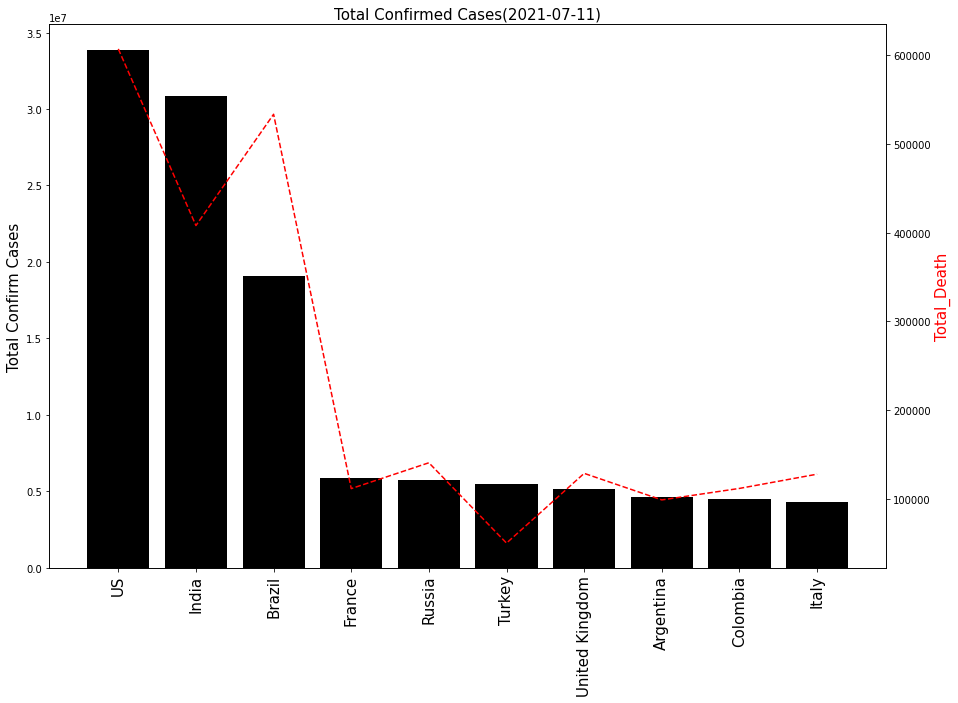

In [115]:
# 아래와 같이 나라별 누적 사망자 수와 확진자 수를 시각화하여 비교하기 (최신일자, 가장 많이 확진된 10국가)
top_ten_case = df_case.loc[df_case.index[-1]].sort_values(ascending=False)[:10]
plt.figure(figsize=[15,10])
plt.xticks(rotation=90,size=15)
sns.barplot(x=top_ten_case.index,y=top_ten_case,color='black')
plt.ylabel('Total Confirm Cases', size=15)
plt.xlabel('')
plt.title('Total Confirmed Cases(%s)' % top_ten_case.name.strftime('%Y-%m-%d'),size=15)
ax = plt.gca()
ax2 = ax.twinx()

top_ten_death = df_death.loc[df_death.index[-1]][top_ten_case.index]
ax2.plot(top_ten_death.index, top_ten_death,'r--')
ax2.set_ylabel('Total_Death',color='red',size=15)
plt.show()

In [ ]:
# 이 셀의 결과가 지워지지 않도록 주의하세요.

### 문제 6. 특정 국가의 확진자 수 및 사망자 수 변화 시각화하기

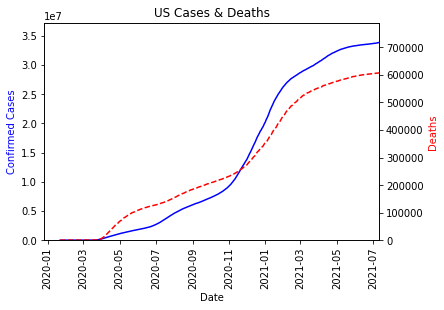

In [135]:
country = 'US'
plt.plot(df_case.index,df_case[country],'b-')
plt.ylabel('Confirmed Cases',color='blue')
plt.title(country + ' Cases & Deaths')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.xlim(right= df_case.index[-1])
plt.ylim(0, df_case[country].max() * 1.1)

ax = plt.gca()
ax2 = ax.twinx()
ax2.set_ylabel('Deaths',color='red')
ax2.plot(df_death.index,df_death[country],'r--')
ax2.set_ylim(0,df_death[country].max()*1.3)
plt.show()

In [136]:
# 나라별 시간에 따른 확진자 수 및 사망자 수 시각화하기
def plot_case_with_death(country):
    plt.plot(df_case.index,df_case[country],'b-')
    plt.ylabel('Confirmed Cases',color='blue')
    plt.title(country + ' Cases & Deaths')
    plt.xlabel('Date')
    plt.xticks(rotation=90)
    plt.xlim(right= df_case.index[-1])
    plt.ylim(0, df_case[country].max() * 1.1)
    
    ax = plt.gca()
    ax2 = ax.twinx()
    ax2.set_ylabel('Deaths',color='red')
    ax2.plot(df_death.index,df_death[country],'r--')
    ax2.set_ylim(0,df_death[country].max()*1.3)
    plt.show()
  # TODO: 입력받은 국가의 누적 확진자/사망자 수 시각화

In [ ]:
# 아래와 같은 결과가 나오도록 하시오. 결과가 지워지지 않도록 주의하세요.
plot_case_with_death('Germany')

In [ ]:
plot_case_with_death('Japan')

In [ ]:
plot_case_with_death('US')

In [ ]:
plot_case_with_death('China')

### 문제 7. 한국의 확진자 수 및 사망자 수 변화 시각화/분석하기

In [ ]:
# 한국의 누적 확진자 수/사망자 수를 시각화하고 분석하시오.
plot_case_with_death('Korea, South')

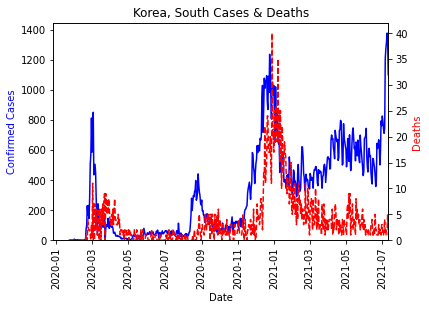

In [155]:
# 한국의 일일 확진자 수/사망자 수를 시각화하고 분석하시오.
country = 'Korea, South'
plt.plot(df_case.index,df_case[country].diff(),'b-')
plt.ylabel('Confirmed Cases',color='blue')
plt.title(country + ' Cases & Deaths')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.xlim(right= df_case.index[-1])
plt.ylim(bottom=0)
 
ax = plt.gca()
ax2 = ax.twinx()
ax2.set_ylabel('Deaths',color='red')
ax2.plot(df_death.index,df_death[country].diff(),'r--')
ax2.set_ylim(bottom=0)
plt.show()

## Step 3. Plotly를 이용하여 데이터 시각화하기

### 문제 8. Plotly의 Choropleth 데이터 포맷으로 맞추기

In [156]:
import plotly.graph_objects as go

In [157]:
# 아래 데이터프레임를 이용하여 국가명을 국가코드로 변경
df_code = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')

# Hint) 이름이 다르게 쓰인 국가의 이름을 먼저 변경한 후에 코드로 변경
country_renamer = {
    'Bahamas':'Bahamas, The',
    'Congo (Brazzaville)':'Congo, Republic of the',
    'Congo (Kinshasa)':'Congo, Democratic Republic of the',
    'Czechia':'Czech Republic',
    'Eswatini':'Swaziland',
    'Gambia':'Gambia, The',
    'North Macedonia':'Macedonia',
    'Taiwan*':'Taiwan',
    'US':'United States',
    'West Bank and Gaza':'West Bank'
}

In [167]:
df_code

,COUNTRY,GDP (BILLIONS),CODE
0,Afghanistan,21.71,AFG
1,Albania,13.40,ALB
2,Algeria,227.80,DZA
3,American Samoa,0.75,ASM
4,Andorra,4.80,AND
...,...,...,...
217,Virgin Islands,5.08,VGB
218,West Bank,6.64,WBG
219,Yemen,45.45,YEM
220,Zambia,25.61,ZMB


In [169]:
country_to_code = df_code.set_index('COUNTRY')['CODE']

In [171]:
df_c = df_case.rename(country_renamer,axis=1).copy()
for col in df_c.columns:
    if col not in country_to_code.index:
        df_c.drop(col,axis=1,inplace=True)
df_code = df_c.rename(country_to_code,axis=1)
df_code

Country/Region,AFG,ALB,DZA,AND,AGO,ATG,ARG,ARM,AUS,AUT,AZE,BHM,BHR,BGD,BRB,BLR,BEL,BLZ,BEN,BTN,BOL,BIH,BWA,BRA,BRN,BGR,BFA,MMR,BDI,CPV,KHM,CMR,CAN,CAF,TCD,CHL,CHN,COL,COM,COG,...,SRB,SYC,SLE,SGP,SVK,SVN,SLB,SOM,ZAF,SSD,ESP,LKA,SDN,SUR,SWE,CHE,SYR,TWN,TJK,TZA,THA,TLS,TGO,TTO,TUN,TUR,USA,UGA,UKR,ARE,GBR,URY,UZB,VUT,VEN,VNM,WBG,YEM,ZMB,ZWE
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,...,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,...,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,6,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,0,...,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,8,0,0,0,0,0,5,0,0,0,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-07,129021,132557,143032,14021,39491,1265,4593763,225801,30903,651008,336684,12965,266797,977568,4108,423519,1091095,13444,8227,2249,449687,205047,73977,18909037,266,422298,13504,175923,5559,32827,57103,80858,1426122,7141,4952,1576336,103966,4426811,3966,12790,...,717196,16304,5867,62652,391780,257550,20,14995,2112336,10886,3897996,268676,36805,22788,1092083,704352,25735,15128,13690,509,301172,9594,14140,33920,464914,5459923,33770444,84979,2307068,644114,5007964,374665,114039,4,280980,23385,314869,6934,169003,60227
2021-07-08,130113,132565,143652,14050,39593,1266,4613019,225987,30951,651128,336788,13024,266919,989219,4119,424554,1092477,13476,8227,2252,451224,205047,75388,18962762,266,422353,13505,180055,5585,32883,58057,80858,1426705,7142,4953,1579591,103992,4450086,3976,12790,...,717293,16679,5887,62668,391813,257619,20,14995,2135246,10891,3915313,269946,36805,22997,1092308,704620,25753,15149,13719,509,308230,9657,14176,34241,473229,5465094,33790505,85581,2308142,645653,5040060,375298,114529,4,281907,24810,314869,6936,170456,62383
2021-07-09,131586,132580,144483,14075,39791,1266,4627537,226135,31015,651291,336962,13024,267038,1000543,4128,425804,1093700,13518,8227,2258,451224,205047,75388,19020499,266,422414,13506,184375,5608,32928,59045,80858,1427475,7142,4953,1582391,104019,4471622,3979,12790,...,717403,16679,5963,62678,391852,257703,20,14995,2157687,10891,3937192,271483,36805,23169,1092540,704943,25766,15185,13753,509,317506,9710,14176,34402,481735,5465094,33838746,86140,2309264,647182,5075945,375902,115011,4,282940,26608,315047,6940,172405,65066


In [172]:
# 공식 레퍼런스 참조: https://plotly.com/python/choropleth-maps/#world-choropleth-map
def get_choropleth_data(date):
  # TODO: date에 해당하는 날짜로 데이터 생성
    data = go.Choropleth(
        locations = df_code.columns,
        z = df_code.loc[date],
        text = df_c.columns,
        colorscale = 'Blues',
        autocolorscale=False,
        reversescale=True,
        marker_line_color='darkgray',
        marker_line_width=0.5,
        colorbar_tickprefix = '',
        colorbar_title = 'Confirmed Cases',
    )
    return data

### 문제 9. Choropleth map 시각화하기

In [179]:
# 공식 레퍼런스 참조: https://plotly.com/python/choropleth-maps/#world-choropleth-map
date = df_case.index[-1]
data = get_choropleth_data(date)
fig = go.Figure(data=data)
fig.update_layout(
    title_text='Confirmed Cases in' + str(date),
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ))
fig.show()

## Step 4. 모델 학습을 위한 데이터 전처리 

### 문제 10. FBProphet 학습을 위한 데이터프레임 생성

In [182]:
df_case.reset_index()[['Date','Korea, South']].to_numpy()

array([[Timestamp('2020-01-22 00:00:00'), 1],
       [Timestamp('2020-01-23 00:00:00'), 1],
       [Timestamp('2020-01-24 00:00:00'), 2],
       ...,
       [Timestamp('2021-07-09 00:00:00'), 166722],
       [Timestamp('2021-07-10 00:00:00'), 168046],
       [Timestamp('2021-07-11 00:00:00'), 169146]], dtype=object)

In [184]:
# 공식 레퍼런스 참조: https://facebook.github.io/prophet/docs/quick_start.html#python-api
# 한국의 확진자 수 데이터를 FBProphet에 학습하기 위한 데이터프레임으로 재구성하시오.
df = pd.DataFrame(df_case.reset_index()[['Date','Korea, South']].to_numpy(),columns=['ds','y'])

In [185]:
df

,ds,y
0,2020-01-22,1
1,2020-01-23,1
2,2020-01-24,2
3,2020-01-25,2
4,2020-01-26,3
...,...,...
532,2021-07-07,164028
533,2021-07-08,165344
534,2021-07-09,166722
535,2021-07-10,168046


### 문제 11. 학습데이터와 테스트데이터 분리하기


In [186]:
from math import floor

In [201]:
def train_test_split_df(df, test_size):
  # TODO: test_size(0 < test_size < 1) 비율에 따라 테스트/학습 데이터프레임으로 나누어 반환
  div = floor(df.shape[0] * (1- test_size ))
  return df.loc[:div], df.loc[div + 1:]

In [202]:
train_df, test_df = train_test_split_df(df, 0.1)

In [203]:
train_df.tail()

,ds,y
479,2021-05-15,131671
480,2021-05-16,132290
481,2021-05-17,132818
482,2021-05-18,133471
483,2021-05-19,134117


In [204]:
test_df.head()

,ds,y
484,2021-05-20,134678
485,2021-05-21,135344
486,2021-05-22,135929
487,2021-05-23,136467
488,2021-05-24,136983


## Step 5. Prophet 모델 학습하기

### 문제 12. Prophet 모델 생성 및 학습 데이터 학습하기

In [205]:
from fbprophet import Prophet

In [211]:
model = Prophet(changepoint_range=1.0)
model.fit(train_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### 문제 13. Prophet 모델 학습 결과 시각화하기

In [219]:
from fbprophet.plot import add_changepoints_to_plot

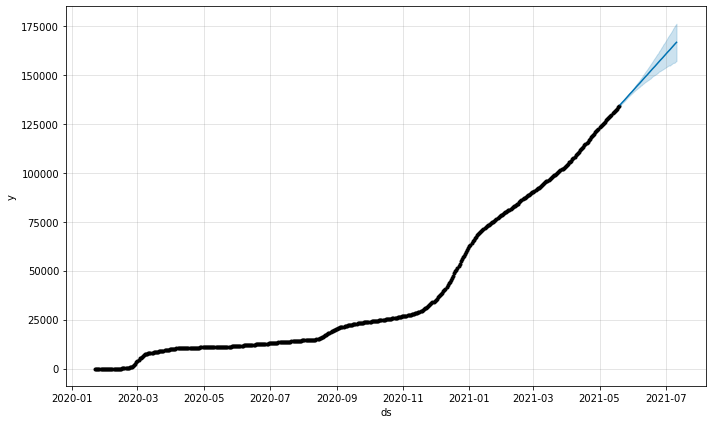

In [212]:
# model.plot() 메소드, model.plot_components() 메소드, add_changepoints_to_plot() 메소드 활용
pred = model.predict(test_df)
model.plot(pred);

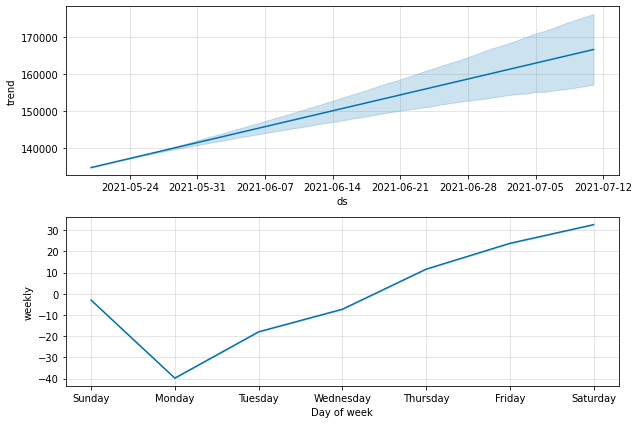

In [214]:
model.plot_components(pred);

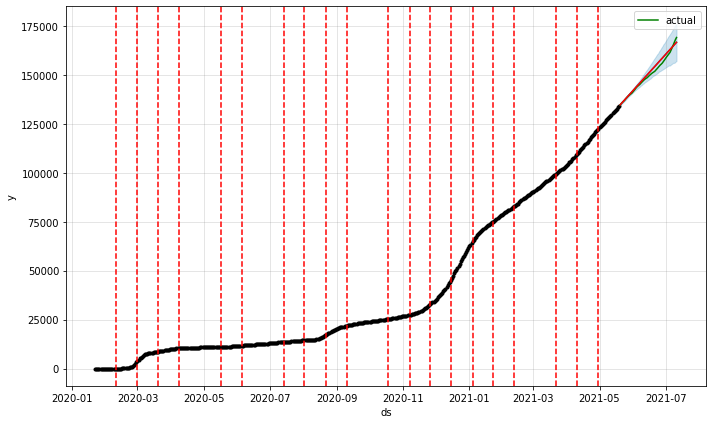

In [221]:
fig = model.plot(pred)
plt.plot(test_df['ds'],test_df['y'],'g-',label='actual')
add_changepoints_to_plot(fig.gca(),model,pred)
plt.legend()

### 문제 14. 모델 학습 결과 평가하기

In [215]:
from sklearn.metrics import r2_score

In [224]:
pred.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-05-20,134724.847680,134228.215168,135182.926654,134724.847680,134724.847680,11.592722,11.592722,11.592722,11.592722,11.592722,11.592722,0.0,0.0,0.0,134736.440402
1,2021-05-21,135339.405932,134906.120321,135903.234806,135339.405932,135339.405932,23.759849,23.759849,23.759849,23.759849,23.759849,23.759849,0.0,0.0,0.0,135363.165781
2,2021-05-22,135953.964185,135477.941816,136496.281620,135953.964185,135953.964185,32.564728,32.564728,32.564728,32.564728,32.564728,32.564728,0.0,0.0,0.0,135986.528913
3,2021-05-23,136568.522437,136057.488305,137103.873863,136568.113875,136568.522437,-2.964600,-2.964600,-2.964600,-2.964600,-2.964600,-2.964600,0.0,0.0,0.0,136565.557837
4,2021-05-24,137183.080689,136562.559587,137698.295860,137143.670624,137216.826269,-39.734310,-39.734310,-39.734310,-39.734310,-39.734310,-39.734310,0.0,0.0,0.0,137143.346379


In [225]:
# test_df와 pred를 비교하여 r2_score 평가
print('R2 Score',r2_score(test_df['y'],pred['yhat']))

R2 Score 0.9743572050504921


### 문제 15. Prophet 모델로 미래 30일 데이터 예측하기

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


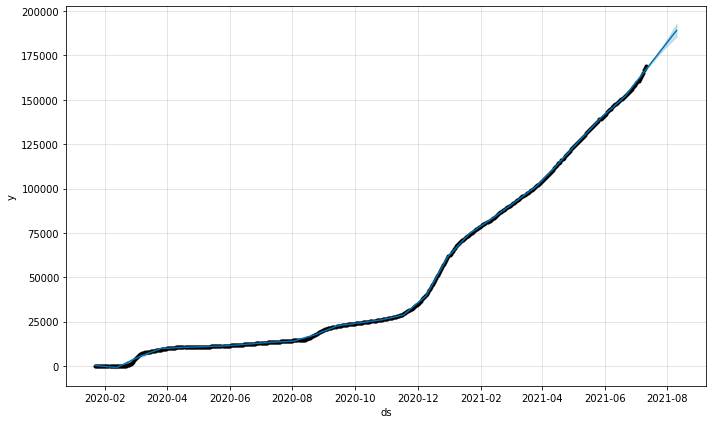

In [227]:
# 전체 df를 학습한 후, 향후 30일에 대한 데이터 예측하기
# Hint) make_future_dataframe() 메소드 활용
model = Prophet(changepoint_range=1)
model.fit(df)
future = model.make_future_dataframe(30)
pred = model.predict(future)
model.plot(pred);

## Step 6. IF-CASE 예측해보기


### 문제 16. 한국 확진자 수 변화의 특별한 이벤트 확인하기


In [228]:
df['ds'][0]

Timestamp('2020-01-22 00:00:00')

In [232]:
# 코로나 확산 초기, 한국의 확진자 수가 급증한 시점 찾기
df.loc[24:30]


,ds,y
24,2020-02-15,28
25,2020-02-16,29
26,2020-02-17,30
27,2020-02-18,31
28,2020-02-19,31
29,2020-02-20,104
30,2020-02-21,204


### 문제 17. 이벤트가 없었을 경우 한국의 확진자 수 변화 예측하기


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


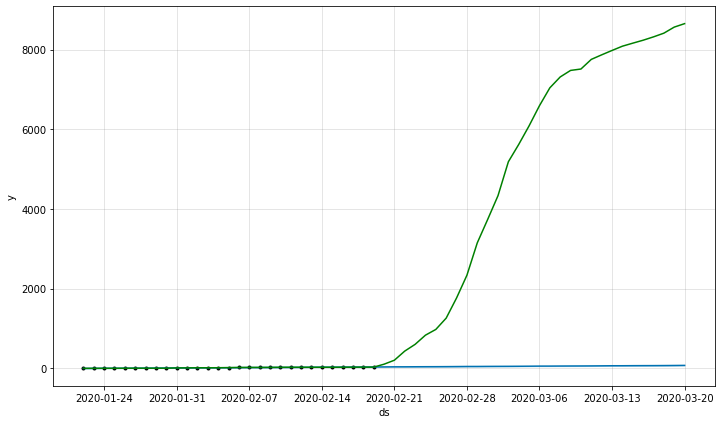

In [237]:
# 확진자 수가 급증하기 전 데이터를 학습 후, 해당 시점으로부터 30일 간의 데이터 예측하여 실제 값과 비교하기
model = Prophet(changepoint_range=1.0)
model.fit(df.loc[:28])
future = model.make_future_dataframe(30)
pred = model.predict(future)
model.plot(pred);
plt.plot(df.loc[:58]['ds'],df.loc[:58]['y'],'g-')
